## Import necessary modules

In [127]:
import time
import pandas as pd
import numpy as np
import datetime as dt
from copy import copy
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline

## Filepath management

In [128]:
project_dir = r'/Users/hudson/Code/marketModel/'

## Load the data from the hdf store

In [129]:
stock_data = pd.read_hdf(project_dir + 'data/stock_data/raw_stock_data.hdf', 'table')
symbols = stock_data.reset_index().ticker.unique()
pprint(symbols)

array(['ASTC', 'PAVM', 'CODA', 'WSTL', 'MICR', 'SEAC', 'GBR', 'CPST',
       'CYAN', 'ATLC', 'WTT', 'LRAD', 'DTRM', 'AVIR', 'UTSI', 'JCS',
       'ZDGE', 'REFR', 'FORD', 'APHB', 'JVA', 'VSR', 'BNSO', 'ARDM', 'LEU',
       'MOC'], dtype=object)


## Visualize the data

In [130]:
symbol = np.random.choice(symbols)
print 'symbol: ' + symbol
stock_data_vis = stock_data.loc[symbol]
stock_data_vis.head()

symbol: ARDM


,open,high,low,close,volume
timestamp,,,,,
2017-08-28 13:30:00,1.2800,1.2800,1.2800,1.2800,3857
2017-08-28 13:58:00,1.3100,1.3100,1.3100,1.3100,100
2017-08-28 14:33:00,1.2972,1.2972,1.2972,1.2972,1390
2017-08-28 14:43:00,1.2922,1.2922,1.2922,1.2922,100
2017-08-28 15:11:00,1.3000,1.3000,1.3000,1.3000,100


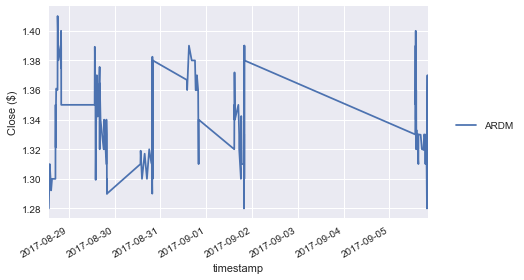

In [131]:
# First keep the time index so we can see the time frame
stock_data_vis.close.plot(label=symbol)

plt.legend(bbox_to_anchor=(1.25, .5))
plt.tight_layout()
plt.ylabel("Close ($)")
sns.despine()

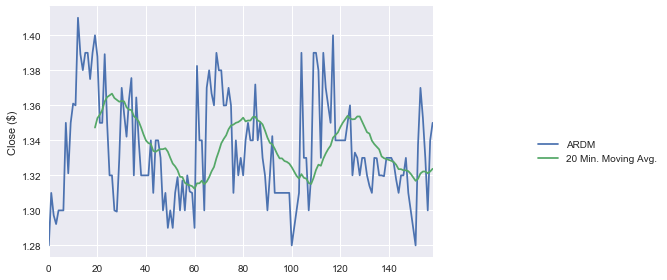

In [132]:
# Now drop the time index so we can see the actual stock movement
stock_data_vis.reset_index().close.plot(label=symbol)
stock_data_vis.reset_index().close.rolling(20).mean().plot(label='20 Min. Moving Avg.')

plt.legend(bbox_to_anchor=(1.25, .5))
plt.tight_layout()
plt.ylabel("Close ($)")
sns.despine()

## Logic for getting goal information

In [133]:
def get_min_max(data, starttime, endtime):
    """
    This function takes data for a specific ticker and returns the min and max prices.
    """
    subdata = data.loc[starttime:endtime]
    
    return (subdata.low.min(), subdata.high.max())
    
def is_goal_met(data, timestep, goal_time_from_step, goal_duration, goal_raise_percent = 0.2, goal_drop_percent=-0.2):
    """
    This function takes data for a specific ticker, a time index for that ticker, goal parameters, and 
    returns a boolean indicating whether or not the goal is satisfied for that timestep.
    """
    
    # Convert time variables to appropriate numpyt date types
    td_goal_time_from_step = np.timedelta64(goal_time_from_step, 'm')
    td_goal_duration = np.timedelta64(goal_duration, 'm')
    
    # Calculate the start and end times of the goal time window
    goal_starttime = timestep + td_goal_time_from_step
    goal_endtime = goal_starttime + td_goal_duration

    print (goal_starttime, goal_endtime)

    # Get the data for goal checking in that time window
    subdata = data.loc[goal_starttime:goal_endtime]

    return(subdata)


In [135]:
# test get_min_max
get_min_max(stock_data_vis, '2017-08-28', '2017-08-30')

(1.28, 1.4299999999999999)

In [140]:
# test is_goal_met
random_time_index = np.random.choice(stock_data_vis.index.values)
print "Random time: " + str(random_time_index)
is_goal_met(stock_data_vis, random_time_index, 5, 10)

Random time: 2017-08-30T19:54:00.000000000
(numpy.datetime64('2017-08-30T19:59:00.000000000'), numpy.datetime64('2017-08-30T20:09:00.000000000'))


,open,high,low,close,volume
timestamp,,,,,
2017-08-30 19:59:00,1.3578,1.38,1.33,1.38,1700
